# HW2 for Statistics with Meteorological Application
---
Student: 林之然 (B11209005, 大氣二), 蔡知諺（B11209014, 大氣二）

### Import and set file path

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path_taipei_1960s = './data/HW2_Taipei_Ts_1961_1970.txt'
file_path_taipei_2000s = './data/HW2_Taipei_Ts_2001_2010.txt'
file_path_taitung_1960s = './data/HW2_Taitung_Ts_1961_1970.txt'
file_path_taitung_2000s = './data/HW2_Taitung_Ts_2001_2010.txt'


### Define function

In [2]:
# Function to read the temperature data from text file and extract data for July
def read_temperature_data(file_path):
    # Read the data into a DataFrame
    df = pd.read_csv(file_path, delim_whitespace=True, header=None)
    
    # each month has 31 days and the entire year is 372 days long
    # the year starts on column index 0
    # 1st July is day 186 and 31st July is day 216
    july_data = pd.DataFrame()
    for year in range(1961, 1971):
        start_day = 186 + (year - 1961) * 372
        end_day = start_day + 31
        july_data = pd.concat([july_data, df.iloc[:, start_day:end_day]], axis=1)
    
    return july_data 


# Function to calculate mean maximum and minimum temperatures for July for a given data set
def calculate_mean_max_min(july_data):
    # Calculate daily max and min temperatures
    daily_max_temps = july_data.max(axis=0)
    daily_min_temps = july_data.min(axis=0)
    
    # Calculate mean of the daily max and min temperatures for July
    mean_max_temp = daily_max_temps.mean()
    mean_min_temp = daily_min_temps.mean()
    
    return mean_max_temp, mean_min_temp

# Function to calculate mean DTR and variance of temperatures for July for a given data set
def calculate_DTR_variance(july_data):
    # Calculate daily max and min temperatures
    daily_max_temps = july_data.max(axis=0)
    daily_min_temps = july_data.min(axis=0)    
    
    # Calculate DTR
    DTR = daily_max_temps - daily_min_temps
    
    # Calculate mean DTR
    DTR_mean = DTR.mean()
    
    # Calculate variance
    var_temp = np.nanvar(july_data.values.flatten())
    print(var_temp)
    # var_mean = var_temp.mean()
    
    return DTR_mean, var_temp


# Calculate average diurnal cycle of given data
def calculate_average_diurnal_cycle(july_data):
    diurnal_cycle = july_data.mean(axis=1)
    
    return diurnal_cycle

### Calculate and plot

#### 2.1 Calculate mean temperature of July in each station

In [3]:
# Read the Taipei temperature data for the 1960s
july_temps_taipei_1960s = read_temperature_data(file_path_taipei_1960s)

# Compute the mean Ts for July for the 1960s for Taipei station
mean_july_temps_taipei_1960s = july_temps_taipei_1960s.mean().mean()  # Mean of all July data (310 month)
print(f"mean temp in July 1960s, Taipei  = {mean_july_temps_taipei_1960s :.2f} °C")

# Read the Taipei temperature data for the 2000s
july_temps_taipei_2000s = read_temperature_data(file_path_taipei_2000s)
# Compute the mean Ts for July for the 2000s for Taipei station
mean_july_temps_taipei_2000s = july_temps_taipei_2000s.mean().mean()  # Mean of all July data
print(f"mean temp in July 2000s, Taipei  = {mean_july_temps_taipei_2000s :.2f} °C")

# Read the Taitung temperature data for the 1960s
july_temps_taitung_1960s = read_temperature_data(file_path_taitung_1960s)

# Compute the mean Ts for July for the 1960s for Taitung station
mean_july_temps_taitung_1960s = july_temps_taitung_1960s.mean().mean()  # Mean of all July data
print(f"mean temp in July 1960s, Taitung = {mean_july_temps_taitung_1960s :.2f} °C")

# Read the Taitung temperature data for the 2000s
july_temps_taitung_2000s = read_temperature_data(file_path_taitung_2000s)

# Compute the mean Ts for July for the 2000s for Taitung station
mean_july_temps_taitung_2000s = july_temps_taitung_2000s.mean().mean()  # Mean of all July data
print(f"mean temp in July 2000s, Taitung = {mean_july_temps_taitung_2000s :.2f} °C")


mean temp in July 1960s, Taipei  = 28.71 °C
mean temp in July 2000s, Taipei  = 30.00 °C
mean temp in July 1960s, Taitung = 28.54 °C
mean temp in July 2000s, Taitung = 29.06 °C


#### 2.2 Calculate Max/min temperature of July in each station

In [4]:
# Calculate mean max and min temperatures for Taipei 1960s
mean_max_temp_taipei_1960s, mean_min_temp_taipei_1960s = calculate_mean_max_min(july_temps_taipei_1960s)
print(f"In July 1960s, Taipei: ", 
      f"Max temp = {mean_max_temp_taipei_1960s :.2f} °C,",
      f"min temp = {mean_min_temp_taipei_1960s :.2f} °C")

# Calculate mean max and min temperatures for Taipei 2000s
mean_max_temp_taipei_2000s, mean_min_temp_taipei_2000s = calculate_mean_max_min(july_temps_taipei_2000s)
print(f"In July 2000s, Taipei: ", 
      f"Max temp = {mean_max_temp_taipei_2000s :.2f} °C,",
      f"min temp = {mean_min_temp_taipei_2000s :.2f} °C")

# Calculate mean max and min temperatures for Taitung 1960s
mean_max_temp_taitung_1960s, mean_min_temp_taitung_1960s = calculate_mean_max_min(july_temps_taitung_1960s)
print(f"In July 1960s, Taitung:", 
      f"Max temp = {mean_max_temp_taitung_1960s :.2f} °C,",
      f"min temp = {mean_min_temp_taitung_1960s :.2f} °C")

# Calculate mean max and min temperatures for Taitung 2000s
mean_max_temp_taitung_2000s, mean_min_temp_taitung_2000s = calculate_mean_max_min(july_temps_taitung_2000s)
print(f"In July 2000s, Taitung:", 
      f"Max temp = {mean_max_temp_taitung_2000s :.2f} °C,",
      f"min temp = {mean_min_temp_taitung_2000s :.2f} °C")

In July 1960s, Taipei:  Max temp = 33.46 °C, min temp = 25.12 °C
In July 2000s, Taipei:  Max temp = 34.15 °C, min temp = 26.95 °C
In July 1960s, Taitung: Max temp = 31.94 °C, min temp = 25.26 °C
In July 2000s, Taitung: Max temp = 32.17 °C, min temp = 26.33 °C


#### 2.3 Calculate DTR and temperature variance in July in each station

In [16]:
mean_DTR_taipei_1960s, var_taipei_1960s = calculate_DTR_variance(july_temps_taipei_1960s)
print(f"In July 1960s, Taipei:  ", 
      f"DTR = {mean_DTR_taipei_1960s :.2f} °C,",
      f"var. of temp = {var_taipei_1960s :.2f} °C^2")

mean_DTR_taipei_2000s, var_taipei_2000s = calculate_DTR_variance(july_temps_taipei_2000s)
print(f"In July 2000s, Taipei:  ", 
      f"DTR = {mean_DTR_taipei_2000s :.2f} °C,",
      f"var. of temp = {var_taipei_2000s :.2f} °C^2")

mean_DTR_taitung_1960s, var_taitung_1960s = calculate_DTR_variance(july_temps_taitung_1960s)
print(f"In July 1960s, Taitung: ", 
      f"DTR = {mean_DTR_taitung_1960s :.2f} °C,",
      f"var. of temp = {var_taitung_1960s :.2f} °C^2")

mean_DTR_taitung_2000s, var_taitung_2000s = calculate_DTR_variance(july_temps_taitung_2000s)
print(f"In July 2000s, Taitung: ", 
      f"DTR = {mean_DTR_taitung_2000s :.2f} °C,",
      f"var. of temp = {var_taitung_2000s :.2f} °C^2")

9.531893314255983
In July 1960s, Taipei:   DTR = 8.34 °C, var. of temp = 9.53 °C^2
6.8905931999002785
In July 2000s, Taipei:   DTR = 7.20 °C, var. of temp = 6.89 °C^2
6.923121498382029
In July 1960s, Taitung:  DTR = 6.67 °C, var. of temp = 6.92 °C^2
5.221561069018094
In July 2000s, Taitung:  DTR = 5.85 °C, var. of temp = 5.22 °C^2


#### 2.4 Plot average diurnal cycle for 1960s and 2000s 

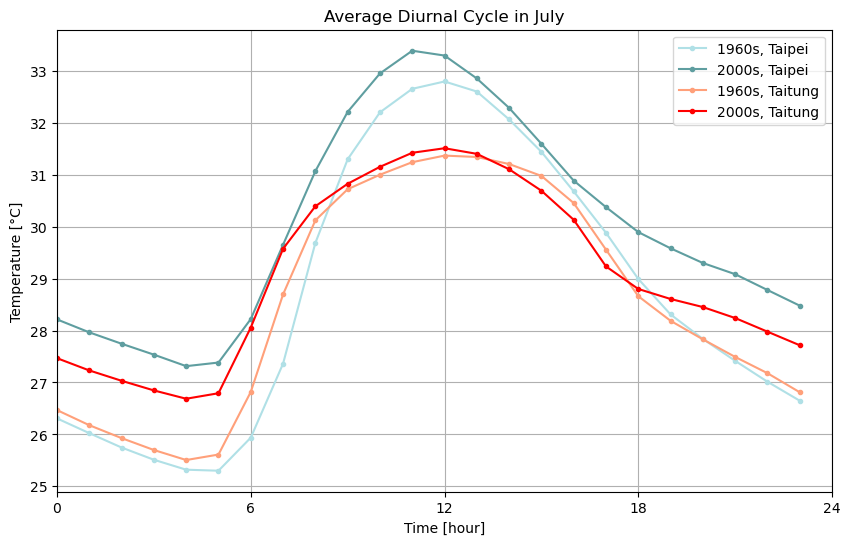

In [6]:
label = ["1960s, Taipei", "2000s, Taipei", "1960s, Taitung", "2000s, Taitung"]
colorlist = ["powderblue","cadetblue","lightsalmon","red"]
plt.figure(figsize=(10, 6))
for c,data in enumerate([july_temps_taipei_1960s, july_temps_taipei_2000s, july_temps_taitung_1960s, july_temps_taitung_2000s]):
    mean_dural_cycle = calculate_average_diurnal_cycle(data)
    
    plt.plot(mean_dural_cycle, '.-',color=colorlist[c])

plt.xlim(0, 23)
plt.title("Average Diurnal Cycle in July")
plt.xlabel("Time [hour]")
plt.ylabel("Temperature [°C]")
plt.xticks([0,6,12,18,24])
plt.legend(label)
plt.grid()
plt.show()
# plt.savefig("hw2_diurnal.png",dpi=300)

### C.f. Boxplot

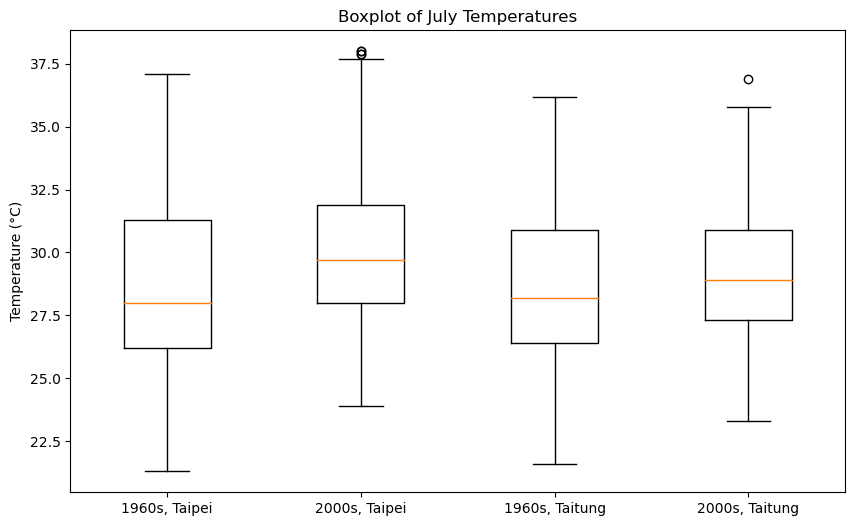

In [15]:
# Function to draw boxplot for the 4 datasets
def draw_boxplot(*data_sets, labels):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.boxplot(data_sets)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Temperature (°C)')
    ax.set_title('Boxplot of July Temperatures')
    plt.show()


# Calculate the average diurnal cycle for each dataset
diurnal_cycle_taipei_1960s = calculate_average_diurnal_cycle(july_temps_taipei_1960s)
diurnal_cycle_taipei_2000s = calculate_average_diurnal_cycle(july_temps_taipei_2000s)
diurnal_cycle_taitung_1960s = calculate_average_diurnal_cycle(july_temps_taitung_1960s)
diurnal_cycle_taitung_2000s = calculate_average_diurnal_cycle(july_temps_taitung_2000s)

# Flatten the data for boxplot
flat_data_taipei_1960s = july_temps_taipei_1960s.values.flatten()
flat_data_taipei_2000s = july_temps_taipei_2000s.values.flatten()
flat_data_taitung_1960s = july_temps_taitung_1960s.values.flatten()
flat_data_taitung_2000s = july_temps_taitung_2000s.values.flatten()

# Remove NaN values from the datasets for boxplot
flat_data_taipei_1960s = flat_data_taipei_1960s[~np.isnan(flat_data_taipei_1960s)]
flat_data_taipei_2000s = flat_data_taipei_2000s[~np.isnan(flat_data_taipei_2000s)]
flat_data_taitung_1960s = flat_data_taitung_1960s[~np.isnan(flat_data_taitung_1960s)]
flat_data_taitung_2000s = flat_data_taitung_2000s[~np.isnan(flat_data_taitung_2000s)]

# Draw the boxplot
draw_boxplot(
    flat_data_taipei_1960s, 
    flat_data_taipei_2000s, 
    flat_data_taitung_1960s, 
    flat_data_taitung_2000s, 
    labels=label
)
